# Showwcase Intern Assignment

Your dataset will consist of records of each session a user completes and will have the following:
- session_id → unique identification number for each session
- customer_id → unique identification number for each customer
- login_date → the date the user logged into Showwcase for that session
- projects_added → boolean if at least one project was added
- likes_given → boolean if at least one like was given
- comment_given → boolean if at least one comment was given
- inactive_status → boolean if the user was inactive or idle
- bugs_occurerd → boolean if a user ran into at least one bug
- session_projects_added → number of projects added
- session_likes_given → number of likes given
- session_comments_given → number of comments given
- inactive_duration → number of seconds a user was inactive or idle
- bugs_in_session → number of bugs a user ran into
- session_duration → number of seconds a user was logged for that session

In [1]:
import pandas as pd
import numpy as np

#### Load csv file

In [2]:
df = pd.read_csv("showwcase_sessions.csv")

df.shape

(302, 14)

#### Check whether df has unknown values

In [3]:
df.isna().sum()

session_id                2
customer_id               2
login_date                2
projects_added            2
likes_given               2
comment_given             2
inactive_status           2
bug_occured               2
session_projects_added    2
session_likes_given       3
session_comments_given    2
inactive_duration         2
bugs_in_session           2
session_duration          2
dtype: int64

#### Drop rows having unknown values in all fields
- There are two rows with all unknown values.

In [4]:
df_cleaned = df.dropna(how='all')
df_cleaned.shape

(300, 14)

#### df_cleaned

In [5]:
df_cleaned

,session_id,customer_id,login_date,projects_added,likes_given,comment_given,inactive_status,bug_occured,session_projects_added,session_likes_given,session_comments_given,inactive_duration,bugs_in_session,session_duration
0,624205.0,80746.0,10/30/19,False,True,True,True,False,0.0,24.0,3.0,1146.0,0.0,1564.0
1,624241.0,24520.0,10/30/19,True,True,True,True,False,2.0,3.0,5.0,133.0,0.0,1766.0
2,111002.0,32047.0,10/30/19,True,True,True,True,False,1.0,5.0,5.0,1571.0,0.0,2230.0
3,545113.0,23404.0,10/30/19,True,True,True,False,False,1.0,10.0,21.0,0.0,0.0,633.0
4,750269.0,40235.0,10/30/19,True,True,False,True,False,3.0,16.0,0.0,1405.0,0.0,1679.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,944212.0,40572.0,10/1/19,True,True,False,True,False,3.0,13.0,0.0,1174.0,0.0,2255.0
296,558332.0,87323.0,10/1/19,True,False,False,True,False,2.0,0.0,0.0,97.0,0.0,1692.0
297,643880.0,51243.0,10/1/19,True,False,False,True,False,2.0,0.0,0.0,906.0,0.0,1990.0
298,844518.0,23083.0,10/1/19,True,False,False,True,False,1.0,0.0,0.0,139.0,0.0,1113.0


#### Number of session is created every day - Top 5

In [6]:
df_cleaned.groupby('login_date').count().sort_values(by='session_id', ascending=False).head()

,session_id,customer_id,projects_added,likes_given,comment_given,inactive_status,bug_occured,session_projects_added,session_likes_given,session_comments_given,inactive_duration,bugs_in_session,session_duration
login_date,,,,,,,,,,,,,
10/26/19,22,22,22,22,22,22,22,22,21,22,22,22,22
10/21/19,15,15,15,15,15,15,15,15,15,15,15,15,15
10/11/19,14,14,14,14,14,14,14,14,14,14,14,14,14
10/15/19,14,14,14,14,14,14,14,14,14,14,14,14,14
10/5/19,14,14,14,14,14,14,14,14,14,14,14,14,14


#### Number of sessions each day - Bar plot
- Date 10/26/19 has the most number of sessions creates

<AxesSubplot:xlabel='login_date'>

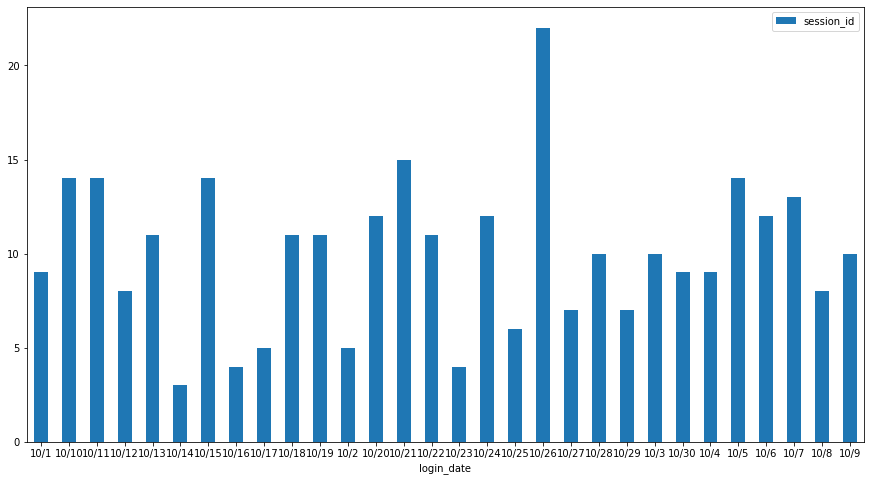

In [7]:
df_ = df_cleaned.copy()

df_['login_date'] = df_['login_date'].str.extract(r'([\d]*/[\d]*)/[\d]*')
df_.groupby('login_date').count().plot.bar(y='session_id', rot=0, figsize=[15,8])

#### Average number of projects added, likes given, comments given, bugs in Inactive session (True) and Not Inactive session (False)

In [8]:
df_.groupby(['inactive_status'])[['session_projects_added',
                                  'session_likes_given',
                                  'session_comments_given',
                                  'bugs_in_session']].mean()

,session_projects_added,session_likes_given,session_comments_given,bugs_in_session
inactive_status,,,,
False,1.570312,11.382812,2.390625,0.976562
True,1.656977,9.766082,2.418605,1.424419


#### Average number of projects added, likes given, comments given, bugs in Inactive session (True) and Not Inactive session (False) - Bar plot
- Users who are actively involved in a session whould give more likes than inactive users.
- There is no significant difference in average number of projects added, comments given and bugs in a session between active users and inactive ones.

<AxesSubplot:xlabel='inactive_status'>

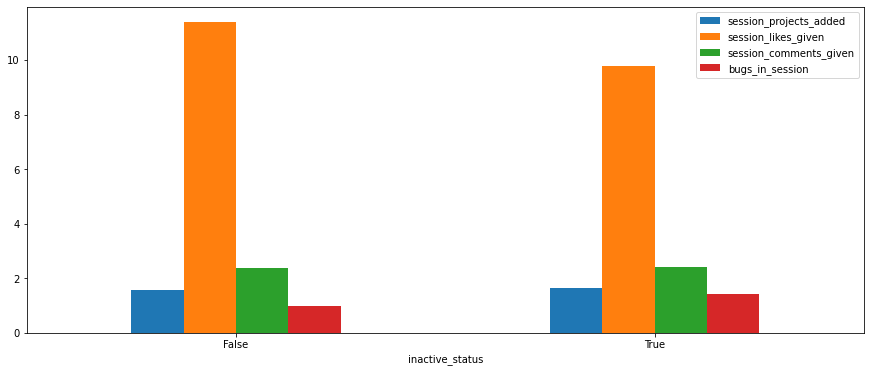

In [9]:
df_.groupby(['inactive_status'])[['session_projects_added',
                                  'session_likes_given',
                                  'session_comments_given',
                                  'bugs_in_session']].mean().plot.bar(rot=0,figsize=[15,6])

#### Average seconds of inactive duration and session duration in Inactive session (True) and Not Inactive session (False)

In [10]:
df_.groupby(['inactive_status'])[['inactive_duration',
                                  'session_duration']].mean()

,inactive_duration,session_duration
inactive_status,,
False,0.000000,1132.640625
True,1278.372093,1227.040698


#### Average seconds of inactive duration and session duration in Inactive session (True) and Not Inactive session (False) - Bar plot
- Users who are actively involved in a session would spend less time on a session.
- Users who are actively involved in a session wouldn't act idle during a session.

<AxesSubplot:xlabel='inactive_status'>

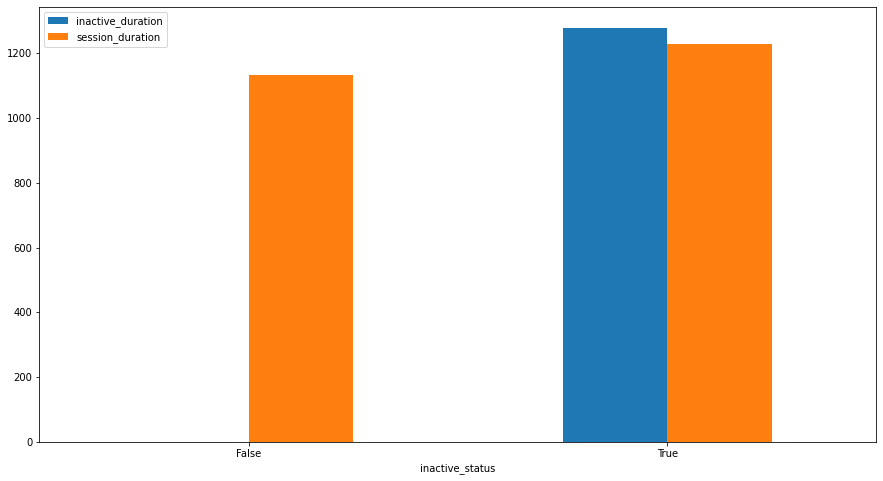

In [11]:
df_.groupby(['inactive_status'])[['inactive_duration',
                                  'session_duration']].mean().plot.bar(rot=0,figsize=[15,8])